# 1. Install and Import Dependencies

In [5]:
#!pytorch --version

'pytorch' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
!pip install torch==1.8.1 torchvision==0.9.1 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [13]:
!pip install torchvision==0.9.1 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
  Using cached https://download.pytorch.org/whl/lts/1.8/cu111/torchvision-0.9.1%2Bcu111-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached torchaudio-0.8.1-cp39-none-win_amd64.whl (109 kB)


In [2]:
#!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
#!cd yolov5 

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
import torch
print(torch.__file__)

C:\Users\TUF\anaconda3\lib\site-packages\torch\__init__.py


# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\TUF/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-19 Python-3.9.12 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [7]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 533x800 28 cars, 5 trucks
Speed: 171.6ms pre-process, 2665.4ms inference, 38.0ms NMS per image at shape (1, 3, 448, 640)


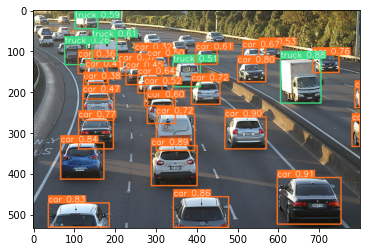

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[251, 216, 174],
         [254, 219, 177],
         [246, 213, 168],
         ...,
         [128, 148, 146],
         [ 70,  79,  52],
         [ 64,  71,  29]],
 
        [[235, 201, 156],
         [234, 200, 155],
         [221, 189, 142],
         ...,
         [122, 141, 139],
         [ 85,  91,  65],
         [ 47,  52,  11]],
 
        [[253, 219, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [136, 155, 153],
         [ 69,  73,  46],
         [ 60,  62,  22]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [4]:
import uuid   # Unique identifier
import os
import time

In [52]:
IMAGES_PATH = os.path.join('dataset_baru', 'images') #/data/images
labels = ['Z']
number_imgs = 20

In [53]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

trainData\images\A.44c22b17-6687-11ed-8028-9408533cbfa2.jpg


In [12]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

dataset_baru\images\A.4e75b68d-67de-11ed-87cc-9408533cbfa1.jpg
dataset_baru\images\A.4e75b68e-67de-11ed-9507-9408533cbfa1.jpg
dataset_baru\images\A.4e75b68f-67de-11ed-a806-9408533cbfa1.jpg
dataset_baru\images\A.4e75b690-67de-11ed-b417-9408533cbfa1.jpg
dataset_baru\images\A.4e75b691-67de-11ed-bb10-9408533cbfa1.jpg
dataset_baru\images\A.4e75b692-67de-11ed-9d6d-9408533cbfa1.jpg
dataset_baru\images\A.4e75b693-67de-11ed-bdac-9408533cbfa1.jpg
dataset_baru\images\A.4e75b694-67de-11ed-a912-9408533cbfa1.jpg
dataset_baru\images\A.4e75b695-67de-11ed-8483-9408533cbfa1.jpg
dataset_baru\images\A.4e75b696-67de-11ed-8172-9408533cbfa1.jpg
dataset_baru\images\A.4e75b697-67de-11ed-9074-9408533cbfa1.jpg
dataset_baru\images\A.4e75b698-67de-11ed-9d7b-9408533cbfa1.jpg
dataset_baru\images\A.4e75b699-67de-11ed-891b-9408533cbfa1.jpg
dataset_baru\images\A.4e75b69a-67de-11ed-abee-9408533cbfa1.jpg
dataset_baru\images\A.4e75b69b-67de-11ed-ba21-9408533cbfa1.jpg
dataset_baru\images\A.4e75b69c-67de-11ed-bc1b-9408533cb

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [15]:
!pip install tensorboard

  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [1]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 10 --data custom2.yaml --weights yolov5s.pt --workers 2 

^C


# 6. Load Custom Model

In [17]:
!cd yolov5 && python detect.py --weights yolov5/runs/train/exp5/weights/last.pt

detect: weights=['yolov5/runs/train/exp5/weights/last.pt'], source=data\images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-237-g55e9516 Python-3.9.12 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Traceback (most recent call last):
  File "C:\Users\TUF\PA\yolov5\detect.py", line 258, in <module>
    main(opt)
  File "C:\Users\TUF\PA\yolov5\detect.py", line 253, in main
    run(**vars(opt))
  File "C:\Users\TUF\anaconda3\lib\site-packages\torch\autograd\grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "C:\Users\TUF\PA\yolov5\detect.py", line 95, in run
    model = DetectMultiBacke

In [29]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\TUF/.cache\torch\hub\master.zip
YOLOv5  2022-11-21 Python-3.9.12 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


In [14]:
img = os.path.join('dataset_baru', 'images', 'E.847d993a-6807-11ed-9824-9408533cbfa1.jpg')

In [15]:
results = model(img)

In [16]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,345.389465,304.115997,500.040405,414.142914,0.818373,2,cat


In [17]:
results.print()

image 1/1: 480x640 1 cat
Speed: 24.0ms pre-process, 19.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


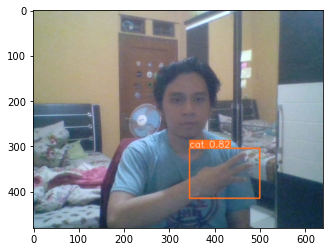

In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO BISINDO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()